In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [32]:
dna_meth = pd.read_csv("data/G7_colon_dna-meth.csv")
gene_expr = pd.read_csv("data/G7_colon_gene-expr.csv")

In [33]:
dna_meth.head()

,Unnamed: 0,Label,cg00002719,cg00020191,cg00021558,cg00024472,cg00058329,cg00060320,cg00063174,cg00063471,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
0,TCGA.3L.AA1B.01,Primary Tumor,0.425515,0.436703,0.470791,0.489124,0.520848,0.564841,0.027920,0.364866,...,0.017584,0.015110,0.578530,0.473453,0.963402,0.047875,0.961194,0.508204,0.036712,0.094153
1,TCGA.4N.A93T.01,Primary Tumor,0.672130,0.106270,0.155840,0.543090,0.844422,0.278043,0.038139,0.053559,...,0.455199,0.966917,0.488998,0.022801,0.966083,0.547980,0.937287,0.762945,0.036739,0.086851
2,TCGA.4T.AA8H.01,Primary Tumor,0.748268,0.164050,0.311851,0.569771,0.807615,0.093203,0.766712,0.750500,...,0.376560,0.967753,0.924707,0.017236,0.413866,0.046266,0.023421,0.971497,0.916638,0.447129
3,TCGA.5M.AAT4.01,Primary Tumor,0.734855,0.305086,0.124479,0.606617,0.643406,0.601940,0.558619,0.517065,...,0.967592,0.967524,0.908705,0.248435,0.020239,0.692241,0.952129,0.973124,0.940750,0.241967
4,TCGA.5M.AAT5.01,Primary Tumor,0.784616,0.098849,0.062913,0.012552,0.121438,0.224108,0.521054,0.032354,...,0.480225,0.386619,0.844465,0.222554,0.178524,0.029880,0.478118,0.970486,0.519334,0.053877


In [34]:
dna_meth["Label"].describe()

count               333
unique                2
top       Primary Tumor
freq                295
Name: Label, dtype: object

In [35]:
gene_expr.head()

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,TCGA.3L.AA1B.01,Primary Tumor,0.5174,18.0851,15.7640,144.4004,774.6615,0.0,441.9729,1.9342,...,71.0832,461.3153,1105.4159,3.3849,543.0368,6259.1876,1358.3172,798.3559,13.0561,0.0000
1,TCGA.4N.A93T.01,Primary Tumor,0.0000,4.4315,4.2767,142.6609,1185.2927,0.0,522.0126,0.4838,...,39.6710,366.7150,1149.4920,0.4838,290.7596,4653.1205,1220.1258,333.8171,1.9352,0.9676
2,TCGA.4T.AA8H.01,Primary Tumor,0.0000,9.8995,11.3032,143.1987,888.3202,0.0,288.0643,2.9245,...,31.4385,349.4791,1083.5313,0.0000,669.7130,4460.6105,3002.0106,530.0676,2.1934,0.0000
3,TCGA.5M.AAT4.01,Primary Tumor,0.0000,7.9174,18.7608,146.1876,1280.5508,0.0,379.5181,2.1515,...,54.6472,542.1687,1374.3546,0.4303,445.3528,4190.1893,1093.3735,574.4406,6.4544,0.4303
4,TCGA.5M.AAT5.01,Primary Tumor,0.0000,12.2565,20.8826,262.5109,1299.8431,0.0,279.4564,0.9892,...,29.1822,428.3349,1240.9841,3.4623,550.5043,3878.2609,1016.4298,413.0019,17.3115,0.0000


In [36]:
gene_expr["Label"].describe()

count               326
unique                2
top       Primary Tumor
freq                285
Name: Label, dtype: object

In [37]:
def score(pred, true):
    recall = recall_score(true, pred, pos_label="Primary Tumor")
    precision = precision_score(true, pred, pos_label="Primary Tumor")
    accuracy = accuracy_score(true, pred)

    return {"recall": recall, "precision": precision, "accuracy": accuracy}

In [38]:
meth_features = dna_meth.columns[2:]

Y_meth = dna_meth["Label"]
X_meth = dna_meth[meth_features]

X_meth_train, X_meth_test, Y_meth_train, Y_meth_test = train_test_split(X_meth, Y_meth, test_size=0.2, random_state=3141, stratify=Y_meth)

{'recall': 1.0, 'precision': 0.9833333333333333, 'accuracy': 0.9850746268656716}


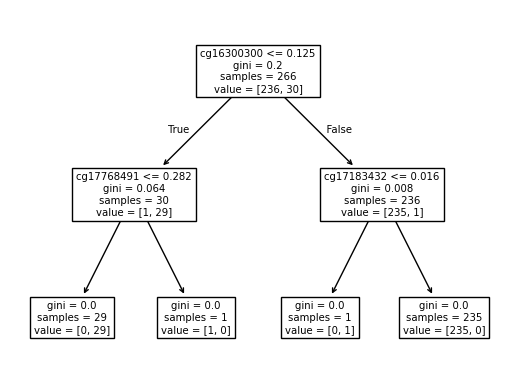

In [39]:
meth_tree = DecisionTreeClassifier()
meth_tree.fit(X_meth_train, Y_meth_train)

meth_prediction = meth_tree.predict(X_meth_test)
print(score(meth_prediction, Y_meth_test))

tree.plot_tree(meth_tree, feature_names=meth_features)
plt.show()

In [44]:
meth_forest = RandomForestClassifier(n_estimators=500)
meth_forest.fit(X_meth_train, Y_meth_train)
meth_forest_prediction = meth_forest.predict(X_meth_test)
print(score(meth_forest_prediction, Y_meth_test))

# Map to feature names
feature_importance_df = pd.DataFrame({
    'feature': X_meth_train.columns,
    'importance': meth_forest.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance_df.head(20))

{'recall': 1.0, 'precision': 1.0, 'accuracy': 1.0}
         feature  importance
3952  cg21646598    0.019399
657   cg03414318    0.014929
3011  cg16300300    0.013161
3330  cg17872757    0.012761
3114  cg16734433    0.012725
1121  cg06072021    0.012431
1713  cg09170112    0.012412
150   cg00817367    0.012118
2780  cg14861089    0.011930
756   cg04025964    0.011506
3724  cg20219457    0.011338
875   cg04747226    0.010982
81    cg00488788    0.010266
561   cg02914087    0.010110
1479  cg07974511    0.010110
616   cg03257172    0.010082
3012  cg16302790    0.010037
1515  cg08189989    0.010005
2745  cg14650610    0.009673
2643  cg14175690    0.009606


In [41]:
gene_features = gene_expr.columns[2:]

Y_gene = gene_expr["Label"]
X_gene = gene_expr[gene_features]

X_gene_train, X_gene_test, Y_gene_train, Y_gene_test = train_test_split(X_gene, Y_gene, test_size=0.2, random_state=1223, stratify=Y_gene)

{'recall': 1.0, 'precision': 1.0, 'accuracy': 1.0}


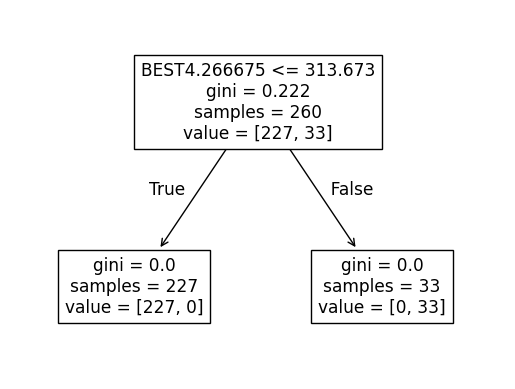

In [42]:
gene_tree = DecisionTreeClassifier()
gene_tree.fit(X_gene_train, Y_gene_train)

gene_prediction = gene_tree.predict(X_gene_test)
print(score(gene_prediction, Y_gene_test))

tree.plot_tree(gene_tree, feature_names=gene_features)
plt.show()

In [45]:
gene_forest = RandomForestClassifier(n_estimators=500)
gene_forest.fit(X_gene_train, Y_gene_train)
gene_forest_prediction = gene_forest.predict(X_gene_test)
print(score(gene_forest_prediction, Y_gene_test))

# Map to feature names
feature_importance_df = pd.DataFrame({
    'feature': X_gene_train.columns,
    'importance': gene_forest.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance_df.head(20))

{'recall': 1.0, 'precision': 1.0, 'accuracy': 1.0}
              feature  importance
12786     OTOP2.92736    0.023530
8443        IL6R.3570    0.012473
5752        ETV4.2118    0.011783
18364   TMIGD1.388364    0.011178
15546   SCARA5.286133    0.010749
15593      SCGN.10590    0.010149
7087       GLP2R.9340    0.009979
2842          CA7.766    0.009917
16328  SLC39A10.57181    0.009423
8976   KIAA1199.57214    0.009215
15740    SEMA6D.80031    0.009108
15371    RSPO2.340419    0.009010
7257      GPD1L.23171    0.008131
8718        JUB.84962    0.008080
9268     KRT80.144501    0.008000
10190  LOC92659.92659    0.008000
3870      CLEC3B.7123    0.007953
12787    OTOP3.347741    0.007633
18630     TRIB3.57761    0.007517
8665      ITM2C.81618    0.007508
